In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path='/content/drive/My Drive/machine learning/headbrain.csv'
df=pd.read_csv(file_path)
print(df.head())

   Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0       1          1             4512                 1530
1       1          1             3738                 1297
2       1          1             4261                 1335
3       1          1             3777                 1282
4       1          1             4177                 1590


In [ ]:
x = df['Head Size(cm^3)'].values
y = df['Brain Weight(grams)'].values
X = np.array(x)
Y = np.array(y)
mean_x = np.mean(X)
mean_y = np.mean(Y)
numerator = np.sum((X - mean_x) * (Y - mean_y))
denominator = np.sum((X - mean_x) ** 2)
w1 = numerator / denominator
w0 = mean_y - (w1 * mean_x)

print(f"Calculated coefficients: w1 = {w1:.4f}, w0 = {w0:.4f}")

Calculated coefficients: w1 = 0.2634, w0 = 325.5734


In [ ]:
def predict(x):
    return w0 + w1 * x
y_pred =predict(X)

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X, Y, color='blue', label='Actual data')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.xlabel('Head Size (cm³)')
plt.ylabel('Brain Weight (grams)')
plt.title('Head Size vs Brain Weight')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
mse = np.mean((Y - y_pred) ** 2)
print(f"Mean Squared Error:{mse:.4f}")

Mean Squared Error:5201.3840


In [ ]:
X_2D = X.reshape(-1, 1)
model = LinearRegression()
model.fit(X_2D, Y)

y_pred_sklearn = model.predict(X_2D)
mse_sklearn = mean_squared_error(Y, y_pred_sklearn)

print("\n[Scikit-learn Model]")
print(f"w1 (slope): {model.coef_[0]:.4f}")
print(f"w0 (intercept): {model.intercept_:.4f}")
print(f"Mean Squared Error (sklearn): {mse_sklearn:.4f}")


[Scikit-learn Model]
w1 (slope): 0.2634
w0 (intercept): 325.5734
Mean Squared Error (sklearn): 5201.3840


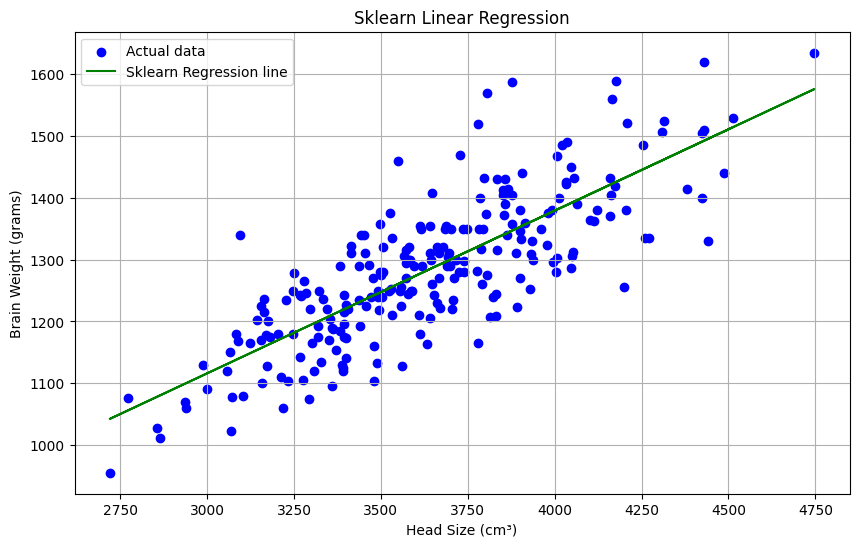

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X, Y, color='blue', label='Actual data')
plt.plot(X, y_pred_sklearn, color='green', label='Sklearn Regression line')
plt.xlabel('Head Size (cm³)')
plt.ylabel('Brain Weight (grams)')
plt.title('Sklearn Linear Regression')
plt.legend()
plt.grid(True)
plt.show()